# Лобанова Валерия 310 loglaplace

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import loglaplace
from math import fabs, pi

### Оценки математического ожидания и дисперсии

In [83]:
#c = float (input ("Please, enter parameter c: "))
c = 5
X = loglaplace.rvs (c, size = 10000)
num_list = [20, 50, 100, 200, 500, 1000, 5000, 10000]
print(X)

[0.92319304 1.04811424 1.77512281 ... 1.38317065 1.20072422 3.50565824]


In [84]:
# f, axes = plt.subplots(2, 4, sharey = True, figsize = (20, 6))
# for i in range (4):
#     axes[0][i].hist(X, bins = num_list[i])
#     axes[1][i].hist(X, bins = num_list[4+i])
# pass

In [91]:
evasion_E = []
evasion_D = []
standard_E, standard_D = loglaplace.stats (c, moments = 'mv')

for n in num_list:
    evasion_E.append (fabs (np.mean (X[:n]) - standard_E))
    evasion_D.append (fabs (np.std (X[:n], ddof = 1) - standard_D))
print ('Max evasion of E: %lf' % max (evasion_E))
print ('Max evasion of D: %lf' % max (evasion_D))

Max evasion of E: 0.047526
Max evasion of D: 0.309954


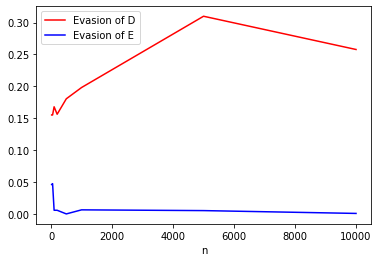

In [92]:
plt.plot (num_list, evasion_D, label = "Evasion of D", color = 'red')
plt.plot (num_list, evasion_E, label = "Evasion of E", color = 'blue')
plt.xlabel ('n')
plt.legend (loc = 0)
plt.show ()

Из графиков видно, что оценка математического ожидания 
$\displaystyle\overline X$
сходится быстрее, чем оценка дисперсии 
$\sqrt{\frac1{n-1}\sum\limits_{i=1}^{n}(X_i-\overline X)^2}$

### Оценка эксцесса распределения

Пусть задана случайная величина $X$, такая что $\mathbb E|X|^3 < \infty$. 

Пусть $\mu_4$ обозначает третий центральный момент: $\mu_4 = \mathbb E[(X - \mathbb E X)^4]$, 
а $\sigma = \sqrt{D[X]}$ — стандартное отклонение $X$. 

Тогда коэффициент эксцесса задаётся формулой: $\displaystyle\gamma_2 = \frac{\mu_4}{\sigma^4} - 3$

Эксцесс - это показатель, характеризующий меру высоты геометрической формы распределения.

Построим оценку: 
$$
\displaystyle\hat\gamma_2 + 3 = 
    \frac
        {\overline{X^4} - 4\,\overline{X^3}\,\overline{X} + 6\,\overline{X^2}\,(\overline X)^2 - 3 (\overline X)^4}
        {\left(\frac1{n}\sum\limits_{i=1}^{n}(X_i-\overline X)^2\right)^2}
    =
    \frac
        {\frac{\sum\limits_{i=1}^{n}X_i^4}{n}
        - 4\,\frac{\sum\limits_{i=1}^{n}X_i^3 \, \sum\limits_{i=1}^{n}X_i}{n^2}
        + 6\,\frac{\sum\limits_{i=1}^{n}X_i^2 \,\Big({\sum\limits_{i=1}^{n}X_i}\Big)^2 }{n^3}
        - 3\,\frac{\Big(\sum\limits_{i=1}^{n}X_i\Big)^4}{n^4}}
        {\left(\frac1{n}\sum\limits_{i=1}^{n}\Big(X_i - \frac{\sum\limits_{i=1}^{n}X_i}{n}\Big)^2\right)^2}
$$


Известно, что 
$$
\overline{X} = \frac1{n}\sum\limits_{i=1}^{n}X_i \xrightarrow{\mathbb{P}} \mathbb{E}X_i \qquad 
\overline{X^2} = \frac1{n}\sum\limits_{i=1}^{n}X_i^2 \xrightarrow{\mathbb{P}} \mathbb{E}X_i^2 \qquad 
\overline{X^3} = \frac1{n}\sum\limits_{i=1}^{n}X_i^3 \xrightarrow{\mathbb{P}} \mathbb{E}X_i^3 \qquad 
\overline{X^4} = \frac1{n}\sum\limits_{i=1}^{n}X_i^4 \xrightarrow{\mathbb{P}} \mathbb{E}X_i^4 
$$


$$
H(u_1, u_2, u_3, u_4) = \frac
    {u_4 - 4 u_3 u_1 + 6 u_2 u_1^2 - 3 u_1^4}
    {u_2 - u_1^2}
$$  

$H(u_1, u_2, u_3, u_4)$ - непрерывная функция $\Rightarrow$ по теореме о наследовании сходимости 

$$
    H\;( \overline{X}, \overline{X^2}, \overline{X^3}, \overline{X^4} ) =
    H\;\Bigg(
    \frac{1}{n}\sum\limits_{i=1}^{n}X_i, \;
    \frac{1}{n}\sum\limits_{i=1}^{n}X_i^2,\; 
    \frac{1}{n}\sum\limits_{i=1}^{n}X_i^3,\;
    \frac{1}{n}\sum\limits_{i=1}^{n}X_i^4
    \Bigg)
    \xrightarrow{\mathbb{P}} \gamma_2 + 3
$$

### Для каких x можно построить состоятельную оценку F(x)?

Определение сходимости по вероятности:
$$
\displaystyle\forall\varepsilon > 0\;
\mathbb{P}\,(|X_n(\omega)-X(\omega)| < \varepsilon) \rightarrow 1
$$

Определение равномерной сходимости: 

$$
\displaystyle \forall\varepsilon > 0 \;
\exists\delta > 0, \;
\exists N = N\,(\varepsilon): \;
\forall n > N,\,\forall\omega \in \Omega \;
|X_n(\omega)-X(\omega)| < \delta 
\Rightarrow \mathbb{P}\,(|X_n(\omega)-X(\omega)|)< \varepsilon
$$

Она включает сходимость по множеству меры нуль. А такого может не быть при сходимости по вероятности.